# CAPSTONE PROJECT


Nama : Rizka Nur Pratama

Study Case : Restaurant Recommendation (Case 3)

#### **Tugas:**
- MELAKUKAN ANALISIS DATA.
- MENEMUKAN INSIGHT DARI DATA.
- MEREKOMENDASIKAN STRATEGI BISNIS TERHADAP PERUSAHAAN TERSEBUT.

### **Insight yang harus ditemukan dari data:**
- PROFILLING CUSTOMER
- ORDER TRANSACTION
- PROFILING VENDOR



### **Goals:**
- MELAKUKAN PROFILING CUSTOMER AGAR BISA MENDAPATKAN CUSTOMER YANG LEBIH TERTARGET(NICHE MARKET), YANG DAPAT MENDUKUNG PENDISTRIBUSIAN PRODUK.
- MEMBERIKAN PRODUCT RECOMMENDATION AGAR BISA MENINGKATKAN REVENUE.
- MENGOPTIMALISASIKAN PENGGUNAAN PAYMENT AGAR LEBIH TERTARGET PADA CUSTOMER.

## CONNECT TO GDRIVE

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount('/content/gdrive')

## IMPORT PACKAGES

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import os
from datetime import datetime as dt
from datetime import date

## SETTING DIRECTORY AND CONNECT TO DATABASE

### Setting Path

### Database Connection

In [ ]:
# Membuat koneksi ke database Restaurant_Dataset.db
conn = sqlite3.connect(path + 'Restaurant_Dataset1.db')

In [ ]:
# Membuat object kursor untuk menjalankan SQL statement
kursor = conn.cursor()

## DATA PREPARATION USING SQL

### Display table

In [ ]:
# Melihat tabel apa saja yang ada pada database Restaurant_Dataset.db
kursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(kursor.fetchall())

[('Orders',), ('Vendors',), ('Customers',), ('Locations',)]


### Display each table

In [ ]:
# Show Orders table as dataframe
df_orders = pd.read_sql_query('SELECT * FROM Orders', conn)
df_orders

,order_id,customer_id,item_count,grand_total,payment_mode,vendor_discount_amount,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER
0,163250.0,QYXXJCF,2.0,9.2,1,0.0,Yes,No,0.0,0.00,78,2019-08-01 05:38:12,0
1,163268.0,O7Q0U3M,1.0,4.6,1,0.0,Yes,No,0.0,0.00,78,2019-08-01 06:16:08,0
2,163275.0,96979ZR,2.0,9.2,1,0.0,Yes,No,0.0,0.00,78,2019-08-01 06:34:51,0
3,163294.0,NDV7DYO,4.0,31.0,1,0.0,Yes,No,0.0,0.00,81,2019-08-01 15:56:11,0
4,163320.0,KHL0M3N,6.0,7.3,1,0.0,Yes,No,0.0,0.00,231,2019-08-01 17:05:41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525,415319.0,OQ4Q99N,4.0,20.1,1,0.0,None,No,0.0,0.26,84,2020-02-29 22:49:54,2
13526,415374.0,3EABH9S,2.0,3.5,1,0.0,No,No,0.0,1.78,907,2020-02-29 23:04:42,0
13527,415475.0,CSGUKZ8,3.0,19.6,2,0.0,No,No,0.0,2.57,13,2020-02-29 23:38:29,4
13528,415503.0,A1WOX6C,1.0,8.4,4,0.0,No,No,0.0,6.31,583,2020-02-29 23:45:58,0


In [ ]:
# Show Customers table as dataframe
df_customers = pd.read_sql_query('SELECT * FROM Customers', conn)
df_customers

,customer_id,gender,dob,status,verified,created_at,updated_at
0,QYXXJCF,male,1932,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,O7Q0U3M,male,1934,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,96979ZR,male,1971,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,NDV7DYO,male,1979,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,KHL0M3N,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09
...,...,...,...,...,...,...,...
8411,FPN3MTC,female,1968,1,1,2020-01-30 21:07:05,2020-01-30 21:07:18
8412,ERHULM8,female,2006,1,1,2020-01-30 21:11:43,2020-01-30 21:12:30
8413,OQ4Q99N,female,1941,1,1,2020-01-30 21:18:23,2020-01-30 21:20:26
8414,3EABH9S,female,2001,1,1,2020-01-30 21:21:55,2020-01-30 21:22:41


In [ ]:
# Show Locations table as dataframe
df_locations = pd.read_sql_query('SELECT * FROM Locations', conn)
df_locations

,customer_id,latitude,longitude
0,QYXXJCF,126.032278,-9.106019
1,O7Q0U3M,0.278709,-78.623847
2,96979ZR,0.124485,-78.605621
3,NDV7DYO,-0.113891,-78.577449
4,KHL0M3N,-0.848796,0.136726
...,...,...,...
8411,FPN3MTC,-0.652975,-78.513739
8412,ERHULM8,-0.655828,-0.132768
8413,OQ4Q99N,-0.132874,0.524485
8414,3EABH9S,0.092679,0.581675


In [ ]:
# Show Vendors table as dataframe
df_vendors = pd.read_sql_query('SELECT * FROM Vendors', conn)
df_vendors

,id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type
0,4,118597.0,-0.588596,0.754434,Restaurants,0.0,6.0,1.0,11:00AM-11:30PM,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,3
1,13,118608.0,-0.471654,0.744470,Restaurants,0.7,5.0,1.0,08:30AM-10:30PM,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03,3
2,20,118616.0,-0.407527,0.643681,Restaurants,0.0,8.0,1.0,08:00AM-10:45PM,19,0.0,1.0,1,1,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55,3
3,23,118619.0,-0.585385,0.753811,Restaurants,0.0,5.0,1.0,10:59AM-10:30PM,16,0.0,1.0,1,11,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17,3
4,28,118624.0,0.480602,0.552850,Restaurants,0.7,15.0,1.0,11:00AM-11:45PM,10,0.0,1.0,1,11,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,0.0,10.0,1.0,None,10,0.0,1.0,1,1,4.1,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 12:47:39,2020-04-07 20:01:33,3
96,855,130463.0,2.145206,0.745025,Restaurants,0.0,8.0,1.0,None,10,0.0,1.0,1,1,4.2,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",2019-12-21 13:02:32,2020-04-07 01:50:41,3
97,856,130464.0,0.251469,0.483632,Restaurants,0.0,7.0,1.0,None,10,0.0,1.0,1,11,4.3,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:04:34,2020-04-06 23:53:16,3
98,858,130468.0,0.019817,0.587087,Restaurants,0.0,3.0,1.0,None,10,0.0,1.0,1,11,4.2,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:12:09,2020-04-07 14:26:08,3


### 1- Profiling Customers

#### Menampilkan customers berdasarkan **Gender**.

In [ ]:
pd.read_sql_query('''SELECT
                        Customers.gender,
                        COUNT (Customers.gender) AS jumlah_customers
                     FROM Customers
                     WHERE Customers.status = 1 AND Customers.verified = 1 
                     GROUP BY Customers.gender
                     ORDER BY jumlah_customers DESC
                  ''', conn)

,gender,jumlah_customers
0,male,5618
1,female,2531


Berdasarkan data tersebut dapat diketahui bahwa **Customer dengan jumlah terbanyak adalah Customer dengan Gender male sebanyak 5662 customers.**

#### Menampilkan customers terbanyak berdasarkan **Usia (Tahun Lahir)**. 

In [ ]:
pd.read_sql_query('''SELECT
                        Customers.dob AS tahun_lahir,
                        COUNT (Customers.dob) AS jumlah_customers
                     FROM Customers
                     WHERE Customers.status = 1 AND Customers.verified = 1 
                     GROUP BY Customers.dob
                     ORDER BY jumlah_customers DESC
                     LIMIT 5
                  ''', conn)

,tahun_lahir,jumlah_customers
0,1970,166
1,1993,138
2,2001,135
3,1995,134
4,1987,133


Berdasarkan data tersebut dapat diketahui bahwa **Customer terbanyak** memiliki tahun lahir pada **1970** dengan jumlah sebanyak **166** customers.

#### Menampilkan customers berdasarkan **location order**.

In [ ]:
# Menampilkan jumlah seluruh Customer berdasarkan Location.
pd.read_sql_query('''SELECT
                        Customers.gender,
                        Locations.longitude,
                        Locations.latitude
                     FROM Customers
                     LEFT JOIN Locations
                     ON Customers.customer_id = Locations.customer_id
                     WHERE Customers.status = 1 AND Customers.verified = 1
                  ''', conn)

,gender,longitude,latitude
0,male,-9.106019,126.032278
1,male,-78.623847,0.278709
2,male,-78.605621,0.124485
3,male,-78.577449,-0.113891
4,male,0.136726,-0.848796
...,...,...,...
8144,female,-78.513739,-0.652975
8145,female,-0.132768,-0.655828
8146,female,0.524485,-0.132874
8147,female,0.581675,0.092679


Berdasarkan data tersebut dapat diketahui **persebaran lokasi dari customers**.

### 2- Order Transaction

#### Menampilkan jumlah pesanan terbanyak dari masing-masing kategori vendor.

In [ ]:
pd.read_sql_query('''SELECT
                        Orders.order_id,
                        Vendors.vendor_category_en AS vendor_category,
                        Vendors.vendor_tag_name AS vendor_name,
                        COUNT (Orders.item_count) AS jumlah_pesanan
                      FROM Orders
                      LEFT JOIN Customers
                      ON Orders.customer_id = Customers.customer_id
                      LEFT JOIN Vendors
                      ON Orders.vendor_id = Vendors.id
                      GROUP BY Vendors.vendor_category_en
                      ORDER BY jumlah_pesanan DESC
                  ''', conn)

,order_id,vendor_category,vendor_name,jumlah_pesanan
0,415515.0,Restaurants,"Burgers,Desserts,Free Delivery,Pasta,Sandwiches",11520
1,414805.0,Sweets & Bakes,Churros,1361


Dari data diatas, kita dapat melihat beberapa informasi penting tentang **ORDER TRANSACTION**, diantaranya adalah **product yang paling sering dipesan**, yaitu :
- **Restaurant : Burgers, Dessert, Free Delivery, Pasta, Sandwiches**
- **Sweet & Bakes : Churros**

Data tersebut dapat digunakan untuk menentukan **product mana yang akan diproduksi dengan jumlah lebih banyak** dibanding product yang lain.

#### Menampilkan customer order dengan jumlah pembayaran terbanyak.

In [ ]:
pd.read_sql_query('''SELECT
                        Orders.order_id,
                        Orders.customer_id,
                        SUM (Orders.grand_total) AS jumlah_pembayaran
                      FROM Orders
                      GROUP BY customer_id
                      ORDER BY jumlah_pembayaran DESC
                      LIMIT 5
                  ''', conn)

,order_id,customer_id,jumlah_pembayaran
0,389457.0,UO5X10D,445.3
1,387678.0,XW90EAP,444.1
2,347959.0,VTHMCR3,407.9
3,363306.0,2JJAO46,309.8
4,405232.0,VDEJEMP,300.1


Customers dengan jumlah pembayaran terbanyak sejumlah **445.3** dengan customer_id **'UO5X10D'**.

### 3- Product Recommendation

#### Menampilkan Product Recommendation berdasarkan Rating dan Favorite Customers. 

In [ ]:
pd.read_sql_query('''SELECT
                        Vendors.id AS vendor_id,
                        Vendors.vendor_category_en AS vendor_catagory,
                        Vendors.vendor_tag_name AS vendor_name,
                        Vendors.vendor_rating AS rating,
                        Orders.is_favorite
                      FROM Vendors
                      LEFT JOIN Orders
                      ON  Vendors.id = Orders.vendor_id
                      WHERE Orders.is_favorite = 'Yes' AND Vendors.vendor_rating > 4.5
                      GROUP BY Vendors.vendor_tag_name
                      ORDER BY Vendors.vendor_rating DESC
                  ''', conn)

,vendor_id,vendor_catagory,vendor_name,rating,is_favorite
0,310,Restaurants,"Bagels,Desserts,Salads",4.8,Yes
1,115,Sweets & Bakes,"Desserts,Free Delivery,Healthy Food,Sweets",4.8,Yes
2,113,Restaurants,"Arabic,Desserts,Free Delivery,Indian",4.7,Yes
3,13,Restaurants,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",4.7,Yes
4,303,Restaurants,"Coffee,Fresh Juices,Hot Chocolate,Sandwiches,S...",4.7,Yes
5,298,Restaurants,"Free Delivery,Fresh Juices,Pastas,Salads,Sandw...",4.7,Yes
6,75,Restaurants,"Asian,Desserts,Healthy Food,Japanese,Salads,Sushi",4.6,Yes
7,288,Restaurants,"Asian,Desserts,Rice,Salads,Soups,Thai",4.6,Yes
8,110,Restaurants,"Asian,Dimsum,Grills,Japanese,Rice,Soups",4.6,Yes
9,92,Restaurants,"Asian,Fresh Juices,Kids meal",4.6,Yes


Dari data diatas dapat diketahui **PRODUCT RECOMMENDATIONS** berdasarkan **favorite customer** dengan **rating tertinggi**. Dengan data teratas adalah :
- **Restaurant : Bagels, Dessert, Salads**
- **Sweets & Bake : Desserts, Free Delivery, Health Food, Sweets**

### 4- Payment Method **Recommendation**

#### Menampilkan Payment Method Recommendations berdasarkan Payment Method yang paling sering digunakan oleh Customes.

In [ ]:
pd.read_sql_query('''SELECT
                        Orders.payment_mode,
                        COUNT (Orders.customer_id) AS jumlah_customers
                     FROM Orders
                     LEFT JOIN Customers
                     ON Orders.customer_id = Customers.customer_id
                     GROUP BY Orders.payment_mode
                  ''', conn)

,payment_mode,jumlah_customers
0,1,10436
1,2,2249
2,3,142
3,4,658
4,5,45


Berdasarkan data diatas, **payment mode "1"** dapat dijadikan sebagai **payment recommendation** dikarenakan jumlah pengguna payment mode "1" merupakan paling banyak dibanding payment mode lainnya. 


!!! Tidak dijelaskan pada data pengertian dari masing-masing payment mode. Sehingga hanya didapatkan id dari payment.

## PROBLEM STATEMENT

#### **List Pertanyaan:**
1. Gender mana yang lebih dominan pada customers? 
2. Berapa rata-rata umur dari customers?
3. Dari mana lokasi dominan dari customer?
4. Berapakah rata rata lama berlangganan (Length of stay) dari customer?
6. Cek range tanggal transaksi, tampilkan table jumlah transaksi harian, lalu pada tanggal berapa transaksi terbanyak?
7. Vendor manakah yang menjadi favorite customer dengan rating tertinggi?
7. Tampilakan jumlah pesanan berdasarkan vendor.
8. Product mana yang memiliki jumlah pesanan terbanyak?
8. Payment method mana yang paling sering digunakan oleh customer?
9. Device apakah yang paling sering digunakan oleh customers?

## DATA CLEANSING


Data cleansing yaitu proses mendeteksi dan mengoreksi data yang rusak atau tidak akurat dari kumpulan data, tabel, atau database untuk mengidentifikasi bagian data yang tidak lengkap, tidak benar, tidak akurat atau tidak relevan. 

#### Check and Change Data Types

Pada data sering dijumpai kasus bahwa tipe data tidak sesuai dengan item didalamnya. Misalnya isi suatu kolom merupakan integer, namun setelah dilakukan pengecekan tipe data, ternyata hasil mengatakan bahwa kolom tersebut bertipe data string. Oleh karena itu perlu dilakukan perubahan tipe data pada kolom tersebut.



note :

- kategorik - object,
- string - object,
- numerik.diskrit - integer,
- numerik.kontinu - float,
- date - datetime

##### Orders Table

In [ ]:
# check tipe data tabel orders
df_orders.dtypes

order_id                  float64
customer_id                object
item_count                float64
grand_total               float64
payment_mode                int64
vendor_discount_amount    float64
is_favorite                object
is_rated                   object
driver_rating             float64
deliverydistance          float64
vendor_id                   int64
created_at                 object
LOCATION_NUMBER             int64
dtype: object

Beberapa tipe data tabel orders yang harus diubah:

1. "order_id" = 'object'.  order_id masih bertipe data float, padahal kolom tersebut merupakan suatu object/kategori. Meskipun memiliki nilai number, namun order_id merupakan sebuah kategori unik, sehingga seharusnya memiliki tipe data object buka float.

3. "vendor_id" = 'object'. Sama seperti order_id, vendor_id seharusnya juga memiliki tipe data object.

2. "created_at" = 'datetime'. 
created_at merupakan waktu order dari customer, sehingga seharusnya mempunyai tipe data datetime. Datetime merupakan tipe data yang berkaitan dengan waktu.

In [ ]:
# change tipe data
df_orders['order_id'] = df_orders['order_id'].astype(str)
df_orders['vendor_id'] = df_orders['vendor_id'].astype(str)
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'])

In [ ]:
# check ulang apakah tipe data setelah dilakukan change tipe data sudah benar atau belum
df_orders.dtypes

order_id                          object
customer_id                       object
item_count                       float64
grand_total                      float64
payment_mode                       int64
vendor_discount_amount           float64
is_favorite                       object
is_rated                          object
driver_rating                    float64
deliverydistance                 float64
vendor_id                         object
created_at                datetime64[ns]
LOCATION_NUMBER                    int64
dtype: object

##### Customers Table

In [ ]:
# check tipe data tabel customers
df_customers.dtypes

customer_id    object
gender         object
dob             int64
status          int64
verified        int64
created_at     object
updated_at     object
dtype: object

Beberapa tipe data yang harus diubah adalah: 

1. "created_at" and "updated_at" = 'datetime'.
Merupakan waktu pembuatan akun dan juga waktu updated akun customers, sehingga seharusnya mempunyai tipe data datetime. Datetime merupakan tipe data yang berkaitan dengan waktu.

In [ ]:
# change tipe data
df_customers['created_at'] = pd.to_datetime(df_customers['created_at'])
df_customers['updated_at'] = pd.to_datetime(df_customers['updated_at'])

In [ ]:
# check ulang apakah tipe data setelah dilakukan change tipe data sudah benar atau belum
df_customers.dtypes

customer_id            object
gender                 object
dob                     int64
status                  int64
verified                int64
created_at     datetime64[ns]
updated_at     datetime64[ns]
dtype: object

##### Locations Table

In [ ]:
# check tipe data tabel locations
df_locations.dtypes

customer_id     object
latitude       float64
longitude      float64
dtype: object

Tipe data pada tabel location sudah benar, sehingga tidak diperlukan peubahan tipe data.

##### Vendors Table

In [ ]:
# check tipe data tabel locations
df_vendors.dtypes

id                       int64
authentication_id      float64
latitude               float64
longitude              float64
vendor_category_en      object
delivery_charge        float64
serving_distance       float64
is_open                float64
OpeningTime             object
prepration_time          int64
discount_percentage    float64
status                 float64
verified                 int64
rank                     int64
vendor_rating          float64
vendor_tag              object
vendor_tag_name         object
created_at              object
updated_at              object
device_type              int64
dtype: object

Beberapa data yang harus diubah:

1. "id" = 'object'.
id merupakan sebuah kategori unik, sehingga seharusnya memiliki tipe data 
object buka float.
2. "created_at" and "updated_at" = 'datetime'. Datetime merupakan tipe data yang berkaitan dengan waktu.

In [ ]:
# change tipe data
df_vendors['id'] = df_vendors['id'].astype(str)
df_vendors['created_at'] = pd.to_datetime(df_vendors['created_at'])
df_vendors['updated_at'] = pd.to_datetime(df_vendors['updated_at'])

In [ ]:
# check ulang apakah tipe data setelah dilakukan change tipe data sudah benar atau belum
df_vendors.dtypes

id                             object
authentication_id             float64
latitude                      float64
longitude                     float64
vendor_category_en             object
delivery_charge               float64
serving_distance              float64
is_open                       float64
OpeningTime                    object
prepration_time                 int64
discount_percentage           float64
status                        float64
verified                        int64
rank                            int64
vendor_rating                 float64
vendor_tag                     object
vendor_tag_name                object
created_at             datetime64[ns]
updated_at             datetime64[ns]
device_type                     int64
dtype: object

#### Missing values

Missing value merupakan kejadian yang umum terjadi ketika mengolah data dikarenakan data yang tidak tersedia sehingga terdapat beberapa data yang hilang. Missing value dapat dideteksi dengan munculnya nilai NaN (Not Available) atau blank space pada suatu tabel. 

Beberapa cara yang dapat dilakukan dalam mengatasi missing value, diantaranya :



1.   Menghilangkan atau menghapus data yang hilang. Cara ini banyak digunakan apabila data yang kosong terlalu banyak lebih dari 60%.
2.   Melakukan inputting value dengan data yang menyerupai seperti minimum value, maximum value, mean, median, atau modus. Penggunaan mean banyak digunakan apabila data tersebut adalah data kontinue, bukan kategorik data. Sedangkan modus digunakan ketika kolom yang kosong berisi informasi berupa data kategorik.
3. Melakukan manual inputting value dengan data yang sebenarnya (cara ini membutuhkan high effort untuk mencari data yang hilang tersebut)
Menentukan custom value berdasarkan asumsi bisnis yang terjadi.


##### Orders Table

In [ ]:
# check missing values orders table
df_orders.isnull().any()

order_id                  False
customer_id               False
item_count                 True
grand_total               False
payment_mode              False
vendor_discount_amount    False
is_favorite                True
is_rated                  False
driver_rating             False
deliverydistance          False
vendor_id                 False
created_at                False
LOCATION_NUMBER           False
dtype: bool

In [ ]:
# Melihat jumlah missing values tiap kolom orders table
jumlah_missing_orders = df_orders.isnull().sum()
jumlah_missing_orders

order_id                    0
customer_id                 0
item_count                649
grand_total                 0
payment_mode                0
vendor_discount_amount      0
is_favorite               649
is_rated                    0
driver_rating               0
deliverydistance            0
vendor_id                   0
created_at                  0
LOCATION_NUMBER             0
dtype: int64

In [ ]:
# menghitung rasio jumlah missing values
rasio = jumlah_missing_orders.div(len(df_orders))
rasio

order_id                  0.000000
customer_id               0.000000
item_count                0.047967
grand_total               0.000000
payment_mode              0.000000
vendor_discount_amount    0.000000
is_favorite               0.047967
is_rated                  0.000000
driver_rating             0.000000
deliverydistance          0.000000
vendor_id                 0.000000
created_at                0.000000
LOCATION_NUMBER           0.000000
dtype: float64

Dikarenakan rasio dari masing-masing missing values kurang dari 60%, maka tidak disarankan untuk drop kolom maupun drop baris. Sehingga kita akan menggunakan cara lainnya.

In [ ]:
# Kolom item_count memiliki tipe data float64 sehingga kita harus mengetahui nilai mean dan mediannya terlebih dahulu
df_orders['item_count'].describe()

count    12881.000000
mean         2.425355
std          1.661831
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         33.000000
Name: item_count, dtype: float64

Kolom item_count memiliki nilai mean dan median yang tidak terlalu jauh berbeda. Oleh karena itu permasalahan missing value pada kolom item_count dapat diatasi dengan melakukan input nilai missing value dengan mean.

In [ ]:
# Mengubah NaNs kolom (missing value) item_count dengan nilai Mean 
df_orders['item_count'].fillna(int(df_orders['item_count'].mean()), inplace=True)

In [ ]:
# check ulang apakah missing value masih terdeteksi atau tidak.
df_orders.isnull().sum()

order_id                    0
customer_id                 0
item_count                  0
grand_total                 0
payment_mode                0
vendor_discount_amount      0
is_favorite               649
is_rated                    0
driver_rating               0
deliverydistance            0
vendor_id                   0
created_at                  0
LOCATION_NUMBER             0
dtype: int64

Dikarenakan kolom "is_favorite" memiliki tipe data 'object', sehingga tidak dapat dilakukan inputan missing value menggunakan mean, median maupun standar deviasi. Sehingga untuk kolom tersebut dapat diatasi dengan melakukan drop baris data.

In [ ]:
# Menghapus baris data yang terdapat missing values. 
# axis = 1, untuk kolom
# axis = 0, untuk baris

df_orders = df_orders.dropna( axis=0, how="any")

In [ ]:
# periksa ulang apakah masih terdapat missing values
df_orders.isnull().sum()

order_id                  0
customer_id               0
item_count                0
grand_total               0
payment_mode              0
vendor_discount_amount    0
is_favorite               0
is_rated                  0
driver_rating             0
deliverydistance          0
vendor_id                 0
created_at                0
LOCATION_NUMBER           0
dtype: int64

##### Customers Table

In [ ]:
# Check missing values customers table
df_customers.isnull().any()

customer_id    False
gender         False
dob            False
status         False
verified       False
created_at     False
updated_at     False
dtype: bool

In [ ]:
# check ulang dengan menggunakan isnull.summ() untuk melihat jika ada missing values.
df_customers.isnull().sum()

customer_id    0
gender         0
dob            0
status         0
verified       0
created_at     0
updated_at     0
dtype: int64

##### Locations Table

In [ ]:
# Checck missing values locations table
df_locations.isnull().any()

customer_id    False
latitude        True
longitude       True
dtype: bool

In [ ]:
# Menghitung jumlah missing vavlues tiap kolom
jumlah_missing_locations = df_locations.isnull().sum()
jumlah_missing_locations

customer_id    0
latitude       1
longitude      1
dtype: int64

Cara mengatasi missing values:
- latitude : drop baris
- longitude : drop baris

Dikarenakan tipe data kedua kolom tersebut tidak dapat di manipulasi datanya dan jumlah missing value per kolom hanya sedikit, sehingga bisa dilakukan drop baris saja.

In [ ]:
# Melakukan drop baris data yang memiliki missing values
df_locations = df_locations.dropna( axis=0, how="any")

In [ ]:
# Check apakah masih terdapat missing values
df_locations.isnull().sum()

customer_id    0
latitude       0
longitude      0
dtype: int64

##### Vendor Table


In [ ]:
# check missing values vendor table
df_vendors.isnull().any()

id                     False
authentication_id      False
latitude               False
longitude              False
vendor_category_en     False
delivery_charge        False
serving_distance       False
is_open                False
OpeningTime             True
prepration_time        False
discount_percentage    False
status                 False
verified               False
rank                   False
vendor_rating          False
vendor_tag              True
vendor_tag_name         True
created_at             False
updated_at             False
device_type            False
dtype: bool

In [ ]:
# Menampilkan jumlah missing values dari masing-masing kolom
jumlah_missing_vendors = df_vendors.isnull().sum()
jumlah_missing_vendors

id                     0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
OpeningTime            9
prepration_time        0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             3
vendor_tag_name        3
created_at             0
updated_at             0
device_type            0
dtype: int64

In [ ]:
# menghitung rasio jumlah missing values
rasio = jumlah_missing_vendors.div(len(df_vendors))
rasio

id                     0.00
authentication_id      0.00
latitude               0.00
longitude              0.00
vendor_category_en     0.00
delivery_charge        0.00
serving_distance       0.00
is_open                0.00
OpeningTime            0.09
prepration_time        0.00
discount_percentage    0.00
status                 0.00
verified               0.00
rank                   0.00
vendor_rating          0.00
vendor_tag             0.03
vendor_tag_name        0.03
created_at             0.00
updated_at             0.00
device_type            0.00
dtype: float64

Cara mengatasi missing values:

- Opening time : drop baris
- Vendor tag : drop baris
- Vendor tag name : drop baris

Dikarenakan opening time, vendor tag, vendor tag name tidak dapat digantikan dengan inputan manipulasi data.

In [ ]:
# Mengatasi Missing values dengan drop baris.
df_vendors = df_vendors.dropna(axis=0, how="any")

In [ ]:
# check apakah masih terdapat missing values.
df_vendors.isnull().sum()

id                     0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
OpeningTime            0
prepration_time        0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             0
vendor_tag_name        0
created_at             0
updated_at             0
device_type            0
dtype: int64

### Duplicates Data

##### Orders Table

In [ ]:
# Cek data duplicate dari orders table
df_orders[df_orders.duplicated(keep=False)]

,order_id,customer_id,item_count,grand_total,payment_mode,vendor_discount_amount,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER


##### Customers Table

In [ ]:
# Cek data duplicate dari customers table
df_customers[df_customers.duplicated(keep=False)]

,customer_id,gender,dob,status,verified,created_at,updated_at


##### Locations Table

In [ ]:
# Cek data duplicate dari locations table
df_locations[df_locations.duplicated(keep=False)]

,customer_id,latitude,longitude


##### Vendors Table

In [ ]:
# Cek data duplicate dari vendors table
df_vendors[df_vendors.duplicated(keep=False)]

,id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type


## DATA MANIPULATION

- Renaming
- Removing

##### Renaming Data
Renaming banyak dilakukan untuk merubah nama kolom dalam suatu data. Mengubah nama kolom menjadi nama lain yang dirasa lebih sesuai atau membantu untuk proses analisa data.

In [ ]:
# Renaming Orders table
df_orders = df_orders.rename(columns={"item_count": "jumlah_pesanan", "grand_total": "total_pembayaran", "deliverydistance":"delivery_distance", "vendor_discount_amount":"vendor_discount", "LOCATION_NUMBER":"location_number", "created_at":"transaction_date"})
df_orders.head(5)

,order_id,customer_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,is_rated,driver_rating,delivery_distance,vendor_id,transaction_date,location_number
0,163250.0,QYXXJCF,2.0,9.2,1,0.0,Yes,No,0.0,0.0,78,2019-08-01 05:38:12,0
1,163268.0,O7Q0U3M,1.0,4.6,1,0.0,Yes,No,0.0,0.0,78,2019-08-01 06:16:08,0
2,163275.0,96979ZR,2.0,9.2,1,0.0,Yes,No,0.0,0.0,78,2019-08-01 06:34:51,0
3,163294.0,NDV7DYO,4.0,31.0,1,0.0,Yes,No,0.0,0.0,81,2019-08-01 15:56:11,0
4,163320.0,KHL0M3N,6.0,7.3,1,0.0,Yes,No,0.0,0.0,231,2019-08-01 17:05:41,0


In [ ]:
# Renaming Customers table
df_customers = df_customers.rename(columns={"dob":"birth_date"})
df_customers.head(5)

,customer_id,gender,birth_date,status,verified,created_at,updated_at
0,QYXXJCF,male,1932,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,O7Q0U3M,male,1934,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,96979ZR,male,1971,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,NDV7DYO,male,1979,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,KHL0M3N,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09


In [ ]:
# Renaming Vendors table
df_vendors = df_vendors.rename(columns={"id":"vendor_id", "vendor_category_en":"vendor_category", "OpeningTime":"opening_time"})
df_vendors.head(5)

,vendor_id,authentication_id,latitude,longitude,vendor_category,delivery_charge,serving_distance,is_open,opening_time,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type
0,4,118597.0,-0.588596,0.754434,Restaurants,0.0,6.0,1.0,11:00AM-11:30PM,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,3
1,13,118608.0,-0.471654,0.744470,Restaurants,0.7,5.0,1.0,08:30AM-10:30PM,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03,3
2,20,118616.0,-0.407527,0.643681,Restaurants,0.0,8.0,1.0,08:00AM-10:45PM,19,0.0,1.0,1,1,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55,3
3,23,118619.0,-0.585385,0.753811,Restaurants,0.0,5.0,1.0,10:59AM-10:30PM,16,0.0,1.0,1,11,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17,3
4,28,118624.0,0.480602,0.552850,Restaurants,0.7,15.0,1.0,11:00AM-11:45PM,10,0.0,1.0,1,11,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41,3


### Removing Data
Removing adalah memanipulasi data dengan menghilangkan informasi-informasi yang tidak diperlukan dalam proses analisis

In [ ]:
# Removing Orders Table
df_orders = df_orders.drop(['is_rated'], axis=1)

In [ ]:
# Removing Customers Table
df_customers = df_customers.drop(['status'], axis=1)
df_customers = df_customers.drop(['verified'], axis=1)
df_customers = df_customers.drop(['created_at'], axis=1)

In [ ]:
# Removing Vendors table
df_vendors = df_vendors.drop(['authentication_id'], axis=1)
df_vendors = df_vendors.drop(['vendor_tag'], axis=1)
df_vendors = df_vendors.drop(['created_at'], axis=1)
df_vendors = df_vendors.drop(['updated_at'], axis=1)
df_vendors = df_vendors.drop(['status'], axis=1)
df_vendors = df_vendors.drop(['verified'], axis=1)
df_vendors = df_vendors.drop(['is_open'], axis=1)
df_vendors = df_vendors.drop(['opening_time'], axis=1)
df_vendors = df_vendors.drop(['longitude'], axis=1)
df_vendors = df_vendors.drop(['latitude'], axis=1)
df_vendors = df_vendors.drop(['discount_percentage'], axis=1)

## DATA WRANGLING

#### Merging Data
Merging merupakan proses penggabungan dua atau lebih tabel menjadi satu tabel agar memudahkan dalam mengolah suatu data.

In [ ]:
# Menggabungkan table orders dengan table vendors.
orders_vendors = df_orders.merge(df_vendors, how='right', on='vendor_id')
orders_vendors.reset_index(drop=True)
orders_vendors

,order_id,customer_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,driver_rating,delivery_distance,vendor_id,transaction_date,location_number,vendor_category,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,vendor_tag_name,device_type
0,165920.0,PH2CZRN,2.0,14.1,2,0.0,Yes,0.0,0.00,4,2019-08-05 18:31:50,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
1,166213.0,YGAL6J5,2.0,12.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 01:16:47,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
2,166732.0,LP3E9PN,1.0,6.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 19:15:08,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
3,167448.0,N0VF64A,3.0,8.2,1,0.0,Yes,0.0,0.00,4,2019-08-07 18:56:37,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
4,167624.0,VDC8VZG,4.0,28.0,2,0.0,Yes,0.0,0.00,4,2019-08-07 21:02:42,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,405495.0,3FEMFJU,1.0,9.0,1,0.0,No,0.0,11.56,681,2020-02-25 13:23:39,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3
11857,407877.0,G1RCJ67,2.0,9.8,1,0.0,No,0.0,4.35,681,2020-02-26 14:34:48,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3
11858,411004.0,L66HNZZ,4.0,20.1,3,0.0,No,0.0,7.92,681,2020-02-27 21:47:35,1,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3
11859,414097.0,C29YUB7,3.0,22.3,4,0.0,No,0.0,4.55,681,2020-02-29 15:15:25,1,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3


In [ ]:
# Check apakah masih terdapat missing values
orders_vendors.isnull().sum()

order_id             0
customer_id          0
jumlah_pesanan       0
total_pembayaran     0
payment_mode         0
vendor_discount      0
is_favorite          0
driver_rating        0
delivery_distance    0
vendor_id            0
transaction_date     0
location_number      0
vendor_category      0
delivery_charge      0
serving_distance     0
prepration_time      0
rank                 0
vendor_rating        0
vendor_tag_name      0
device_type          0
dtype: int64

In [ ]:
# Menggabungkan table customers dengan table locations.
cust_loc = df_customers.merge(df_locations, how='left', on='customer_id')
cust_loc.reset_index(drop=True)
cust_loc

,customer_id,gender,birth_date,updated_at,latitude,longitude
0,QYXXJCF,male,1932,2018-02-07 16:45:36,126.032278,-9.106019
1,O7Q0U3M,male,1934,2018-03-22 20:11:47,0.278709,-78.623847
2,96979ZR,male,1971,2018-04-17 20:01:15,0.124485,-78.605621
3,NDV7DYO,male,1979,2018-04-29 22:35:52,-0.113891,-78.577449
4,KHL0M3N,male,1997,2018-05-05 12:38:09,-0.848796,0.136726
...,...,...,...,...,...,...
8411,FPN3MTC,female,1968,2020-01-30 21:07:18,-0.652975,-78.513739
8412,ERHULM8,female,2006,2020-01-30 21:12:30,-0.655828,-0.132768
8413,OQ4Q99N,female,1941,2020-01-30 21:20:26,-0.132874,0.524485
8414,3EABH9S,female,2001,2020-01-30 21:22:41,0.092679,0.581675


In [ ]:
# check apakah masih terdapat missing values
cust_loc.isnull().sum()

customer_id    0
gender         0
birth_date     0
updated_at     0
latitude       1
longitude      1
dtype: int64

In [ ]:
# Menghapus baris missing value
cust_loc = cust_loc.dropna( axis=0, how="any")

In [ ]:
# Check ulang missing values
cust_loc.isnull().sum()

customer_id    0
gender         0
birth_date     0
updated_at     0
latitude       0
longitude      0
dtype: int64

In [ ]:
# Menggabungkan ke-empat tabel sebelumnya menjadi satu dataframe, agar mempermudah proses analisa dan visualisasi data.
data = cust_loc.merge(orders_vendors, how='right', on='customer_id')
data.reset_index(drop=True)
data

,customer_id,gender,birth_date,updated_at,latitude,longitude,order_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,driver_rating,delivery_distance,vendor_id,transaction_date,location_number,vendor_category,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,vendor_tag_name,device_type
0,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,165920.0,2.0,14.1,2,0.0,Yes,0.0,0.00,4,2019-08-05 18:31:50,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
1,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,144214.0,3.0,6.3,2,0.0,Yes,0.0,0.00,55,2019-07-02 18:33:01,0,Restaurants,0.7,10.0,19,11,4.5,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3
2,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,162730.0,2.0,11.1,2,0.0,Yes,0.0,0.00,176,2019-07-31 19:18:18,0,Restaurants,0.7,8.0,21,11,4.3,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3
3,YGAL6J5,female,1988.0,2020-01-15 19:58:59,-0.707368,0.045688,166213.0,2.0,12.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 01:16:47,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
4,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,166732.0,1.0,6.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 19:15:08,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,4KMSXHD,female,1966.0,2020-01-27 00:23:55,0.199798,0.509988,405464.0,2.0,9.8,1,0.0,No,0.0,4.33,681,2020-02-25 13:07:36,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3
11857,3FEMFJU,female,1976.0,2020-01-27 01:32:51,-0.127426,0.150953,405495.0,1.0,9.0,1,0.0,No,0.0,11.56,681,2020-02-25 13:23:39,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3
11858,G1RCJ67,female,2004.0,2020-01-27 23:05:20,0.233558,-78.618511,407877.0,2.0,9.8,1,0.0,No,0.0,4.35,681,2020-02-26 14:34:48,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3
11859,C29YUB7,female,1953.0,2020-01-30 19:47:52,-0.064995,-78.583228,414097.0,3.0,22.3,4,0.0,No,0.0,4.55,681,2020-02-29 15:15:25,1,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3


In [ ]:
# check apakah masih terdapat missing values
data.isnull().sum()

customer_id          0
gender               1
birth_date           1
updated_at           1
latitude             1
longitude            1
order_id             0
jumlah_pesanan       0
total_pembayaran     0
payment_mode         0
vendor_discount      0
is_favorite          0
driver_rating        0
delivery_distance    0
vendor_id            0
transaction_date     0
location_number      0
vendor_category      0
delivery_charge      0
serving_distance     0
prepration_time      0
rank                 0
vendor_rating        0
vendor_tag_name      0
device_type          0
dtype: int64

In [ ]:
# Menghapus baris missing value
data = data.dropna( axis=0, how="any")

In [ ]:
# Check ulang missing values
data.isnull().sum()

customer_id          0
gender               0
birth_date           0
updated_at           0
latitude             0
longitude            0
order_id             0
jumlah_pesanan       0
total_pembayaran     0
payment_mode         0
vendor_discount      0
is_favorite          0
driver_rating        0
delivery_distance    0
vendor_id            0
transaction_date     0
location_number      0
vendor_category      0
delivery_charge      0
serving_distance     0
prepration_time      0
rank                 0
vendor_rating        0
vendor_tag_name      0
device_type          0
dtype: int64

In [ ]:
# Periksa ulang juga tipe datanya, apak sudah tepat atau belum.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11860 entries, 0 to 11860
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        11860 non-null  object        
 1   gender             11860 non-null  object        
 2   birth_date         11860 non-null  float64       
 3   updated_at         11860 non-null  datetime64[ns]
 4   latitude           11860 non-null  float64       
 5   longitude          11860 non-null  float64       
 6   order_id           11860 non-null  object        
 7   jumlah_pesanan     11860 non-null  float64       
 8   total_pembayaran   11860 non-null  float64       
 9   payment_mode       11860 non-null  int64         
 10  vendor_discount    11860 non-null  float64       
 11  is_favorite        11860 non-null  object        
 12  driver_rating      11860 non-null  float64       
 13  delivery_distance  11860 non-null  float64       
 14  vendor

## EXPLORATORY DATA

### Descriptive Statistics

Menampilkan statistika dekriptif dari dataframe.

In [ ]:
# Statistika deskriptif data
data.describe()

,birth_date,latitude,longitude,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,driver_rating,delivery_distance,location_number,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,device_type
count,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.0
mean,1972.584654,2.517081,-25.562283,2.424874,15.665902,1.354469,0.000804,0.689713,4.182460,0.899747,0.353069,12.722175,13.822513,10.274030,4.409368,3.0
std,22.870843,20.279798,37.119813,1.650509,12.226433,0.765310,0.020995,1.686945,4.478691,1.267089,0.350001,3.780551,3.466601,2.594847,0.224213,0.0
min,1900.000000,-671.693058,-79.056171,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000,3.200000,3.0
25%,1953.000000,-0.491115,-78.523155,1.000000,8.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,11.000000,11.000000,4.300000,3.0
50%,1974.000000,-0.087647,0.008808,2.000000,12.200000,1.000000,0.000000,0.000000,2.810000,1.000000,0.700000,15.000000,15.000000,11.000000,4.400000,3.0
75%,1993.000000,0.272533,0.503061,3.000000,18.800000,1.000000,0.000000,0.000000,8.250000,1.000000,0.700000,15.000000,15.000000,11.000000,4.500000,3.0
max,2010.000000,204.948756,44.099462,33.000000,170.000000,5.000000,0.975000,5.000000,16.260000,15.000000,0.700000,15.000000,45.000000,11.000000,4.800000,3.0


In [ ]:
# Menampilkan info dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11860 entries, 0 to 11860
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        11860 non-null  object        
 1   gender             11860 non-null  object        
 2   birth_date         11860 non-null  float64       
 3   updated_at         11860 non-null  datetime64[ns]
 4   latitude           11860 non-null  float64       
 5   longitude          11860 non-null  float64       
 6   order_id           11860 non-null  object        
 7   jumlah_pesanan     11860 non-null  float64       
 8   total_pembayaran   11860 non-null  float64       
 9   payment_mode       11860 non-null  int64         
 10  vendor_discount    11860 non-null  float64       
 11  is_favorite        11860 non-null  object        
 12  driver_rating      11860 non-null  float64       
 13  delivery_distance  11860 non-null  float64       
 14  vendor

In [ ]:
# Periksa ulang apakah masih tedapat missing values sebelum digunakan untuk proses EDA
data.isnull().sum()

customer_id          0
gender               0
birth_date           0
updated_at           0
latitude             0
longitude            0
order_id             0
jumlah_pesanan       0
total_pembayaran     0
payment_mode         0
vendor_discount      0
is_favorite          0
driver_rating        0
delivery_distance    0
vendor_id            0
transaction_date     0
location_number      0
vendor_category      0
delivery_charge      0
serving_distance     0
prepration_time      0
rank                 0
vendor_rating        0
vendor_tag_name      0
device_type          0
dtype: int64

In [ ]:
# Menampilkan 6 data teratas dari data
data.head(7)

,customer_id,gender,birth_date,updated_at,latitude,longitude,order_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,driver_rating,delivery_distance,vendor_id,transaction_date,location_number,vendor_category,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,vendor_tag_name,device_type
0,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,165920.0,2.0,14.1,2,0.0,Yes,0.0,0.0,4,2019-08-05 18:31:50,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
1,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,144214.0,3.0,6.3,2,0.0,Yes,0.0,0.0,55,2019-07-02 18:33:01,0,Restaurants,0.7,10.0,19,11,4.5,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3
2,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,162730.0,2.0,11.1,2,0.0,Yes,0.0,0.0,176,2019-07-31 19:18:18,0,Restaurants,0.7,8.0,21,11,4.3,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3
3,YGAL6J5,female,1988.0,2020-01-15 19:58:59,-0.707368,0.045688,166213.0,2.0,12.8,1,0.0,Yes,0.0,0.0,4,2019-08-06 01:16:47,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
4,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,166732.0,1.0,6.8,1,0.0,Yes,0.0,0.0,4,2019-08-06 19:15:08,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
5,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,188125.0,1.0,11.7,2,0.0,Yes,0.0,0.0,4,2019-09-09 19:03:31,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3
6,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,193146.0,2.0,10.2,2,0.0,Yes,0.0,0.0,20,2019-09-15 17:21:10,0,Restaurants,0.0,8.0,19,1,4.5,"Breakfast,Desserts,Free Delivery,Indian",3


### Start analysis

#### 1- Profiling Customer

##### 1. Gender mana yang lebih dominan pada customers?

In [ ]:
# Melakukan grouping data gender dan customer_id untuk melihat jumlah dari masing-masing gender.
group_gender = data.groupby('gender')['customer_id'].count()
group_gender

gender
female    3176
male      8684
Name: customer_id, dtype: int64

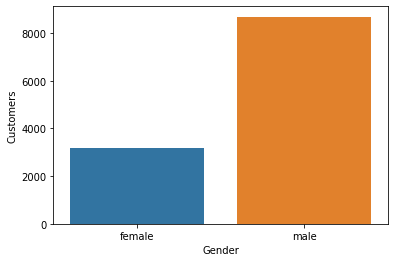

In [ ]:
# Visualisasi Customers Gender
df_group_gender = (group_gender).reset_index()
df_group_gender.rename(columns = {'customer_id': 'Customers', 'gender':'Gender'}, inplace = True)

sns.barplot(data = df_group_gender, x = 'Gender', y = 'Customers')

**Customer dengan jumlah terbanyak adalah Customer dengan Gender male sebanyak 8684 customers.**

##### 2. Berapa umur dari masing-masing customer dan berapakah rata-rata umurnya?

In [ ]:
# Pertama, menentukan datetime sekarang untuk menentukan umur customers
today = date.today()
today.year

2021

In [ ]:
# Membuat kolom baru berupa kolom age
data['age'] = today.year - data['birth_date']
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,gender,birth_date,updated_at,latitude,longitude,order_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,driver_rating,delivery_distance,vendor_id,transaction_date,location_number,vendor_category,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,vendor_tag_name,device_type,age
0,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,165920.0,2.0,14.1,2,0.0,Yes,0.0,0.00,4,2019-08-05 18:31:50,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,78.0
1,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,144214.0,3.0,6.3,2,0.0,Yes,0.0,0.00,55,2019-07-02 18:33:01,0,Restaurants,0.7,10.0,19,11,4.5,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3,78.0
2,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,162730.0,2.0,11.1,2,0.0,Yes,0.0,0.00,176,2019-07-31 19:18:18,0,Restaurants,0.7,8.0,21,11,4.3,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3,78.0
3,YGAL6J5,female,1988.0,2020-01-15 19:58:59,-0.707368,0.045688,166213.0,2.0,12.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 01:16:47,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,33.0
4,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,166732.0,1.0,6.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 19:15:08,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,4KMSXHD,female,1966.0,2020-01-27 00:23:55,0.199798,0.509988,405464.0,2.0,9.8,1,0.0,No,0.0,4.33,681,2020-02-25 13:07:36,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,55.0
11857,3FEMFJU,female,1976.0,2020-01-27 01:32:51,-0.127426,0.150953,405495.0,1.0,9.0,1,0.0,No,0.0,11.56,681,2020-02-25 13:23:39,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,45.0
11858,G1RCJ67,female,2004.0,2020-01-27 23:05:20,0.233558,-78.618511,407877.0,2.0,9.8,1,0.0,No,0.0,4.35,681,2020-02-26 14:34:48,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,17.0
11859,C29YUB7,female,1953.0,2020-01-30 19:47:52,-0.064995,-78.583228,414097.0,3.0,22.3,4,0.0,No,0.0,4.55,681,2020-02-29 15:15:25,1,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,68.0


In [ ]:
# Menentukan rata-rata umur customers
rata_umur = data['age'].mean()
rata_umur

48.41534569983136

**Rata-rata umur dari customers adalah 48 tahun.**

##### 3. Dari mana lokasi dominan dari customer?

In [ ]:
# Data grouping berdasarkan location_number dan customer_id
group_loc = data.groupby('location_number')['customer_id'].count()
group_loc

location_number
0     5842
1     3510
2     1399
3      584
4      292
5      112
6       48
7       38
8       16
9        7
10       5
11       3
12       1
13       1
15       2
Name: customer_id, dtype: int64

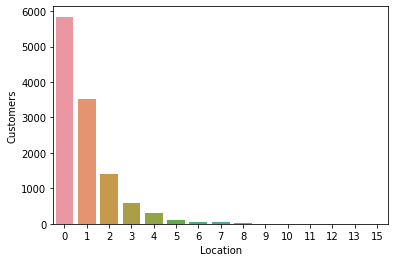

In [ ]:
# visualisasi data customers berdasarkan location number
df_group_loc = (group_loc).reset_index()

df_group_loc.rename(columns = {'customer_id': 'Customers', 'location_number':'Location'}, inplace = True)

sns.barplot(data = df_group_loc, x ='Location', y ='Customers')

**Berdasarkan data diatas, dapat diketahui bahwa lokasi customers paling banyak pada location number = 0.**

##### 4. Berapakah rata rata lama berlangganan (Length of stay) dari customer?

In [ ]:
# Langkah1.Extract kolom customer updated_at ke dalam tahun
data['day_los'] = (dt.now() - data['updated_at']).dt.days
data['los'] = data['day_los']/365
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,customer_id,gender,birth_date,updated_at,latitude,longitude,order_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,driver_rating,delivery_distance,vendor_id,transaction_date,location_number,vendor_category,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,vendor_tag_name,device_type,age,day_los,los
0,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,165920.0,2.0,14.1,2,0.0,Yes,0.0,0.00,4,2019-08-05 18:31:50,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,78.0,1155,3.164384
1,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,144214.0,3.0,6.3,2,0.0,Yes,0.0,0.00,55,2019-07-02 18:33:01,0,Restaurants,0.7,10.0,19,11,4.5,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3,78.0,1155,3.164384
2,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,162730.0,2.0,11.1,2,0.0,Yes,0.0,0.00,176,2019-07-31 19:18:18,0,Restaurants,0.7,8.0,21,11,4.3,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3,78.0,1155,3.164384
3,YGAL6J5,female,1988.0,2020-01-15 19:58:59,-0.707368,0.045688,166213.0,2.0,12.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 01:16:47,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,33.0,567,1.553425
4,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,166732.0,1.0,6.8,1,0.0,Yes,0.0,0.00,4,2019-08-06 19:15:08,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,66.0,1133,3.104110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,4KMSXHD,female,1966.0,2020-01-27 00:23:55,0.199798,0.509988,405464.0,2.0,9.8,1,0.0,No,0.0,4.33,681,2020-02-25 13:07:36,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,55.0,556,1.523288
11857,3FEMFJU,female,1976.0,2020-01-27 01:32:51,-0.127426,0.150953,405495.0,1.0,9.0,1,0.0,No,0.0,11.56,681,2020-02-25 13:23:39,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,45.0,556,1.523288
11858,G1RCJ67,female,2004.0,2020-01-27 23:05:20,0.233558,-78.618511,407877.0,2.0,9.8,1,0.0,No,0.0,4.35,681,2020-02-26 14:34:48,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,17.0,555,1.520548
11859,C29YUB7,female,1953.0,2020-01-30 19:47:52,-0.064995,-78.583228,414097.0,3.0,22.3,4,0.0,No,0.0,4.55,681,2020-02-29 15:15:25,1,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,68.0,552,1.512329


In [ ]:
# Menampilkan rata-rata LOS untuk seluruh customer dalam tahun
data['los'].mean()

2.2182549839450845

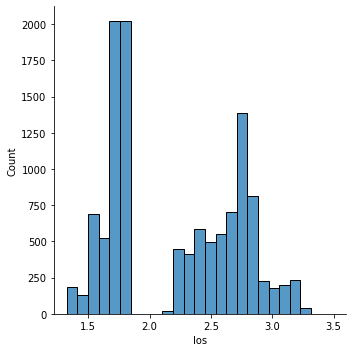

In [ ]:
# Distribusi plot (histogram) dari customer
sns.displot(data= data, x="los")

**Rata-rata Length of Stay customers adalah 2.2 tahun**

##### 5. Apakah device type yang paling sering digunakan oleh customers?

In [ ]:
device_type = data.groupby('device_type')['customer_id'].count().sort_values(ascending = False)
device_type

device_type
3    11860
Name: customer_id, dtype: int64

**Ternyata berdasarkan data, seluruh customers menggunakan tipe data yang sama yaitu device_type = 3.**

**!!! Tidak dijelaskan pada data pengertian dari masing-masing device_type. Sehingga hanya didapatkan id dari device_type.**

#### 2- Order Transaction

##### 1. Cek range tanggal transaksi, tampilkan table jumlah transaksi harian

In [ ]:
# Mengatasi error pada daa type 'transaction_date'
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Mengelompokkan transaksi berdasarkan tanggal

data['new_transaction_date'] = data['transaction_date'].dt.strftime('%m/%d/%Y')

data_harian = data.groupby('new_transaction_date')['jumlah_pesanan'].size()
data_harian

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


new_transaction_date
01/01/2020    48
01/02/2020    70
01/03/2020    44
01/04/2020    31
01/05/2020    54
              ..
12/27/2019    49
12/28/2019    48
12/29/2019    57
12/30/2019    67
12/31/2019    66
Name: jumlah_pesanan, Length: 270, dtype: int64

In [ ]:
# Menampilkan data teratas dari data_harian
data_harian = data_harian.reset_index()
data_harian.head(10)

,new_transaction_date,jumlah_pesanan
0,01/01/2020,48
1,01/02/2020,70
2,01/03/2020,44
3,01/04/2020,31
4,01/05/2020,54
5,01/06/2020,46
6,01/07/2020,53
7,01/08/2020,45
8,01/09/2020,45
9,01/10/2020,28


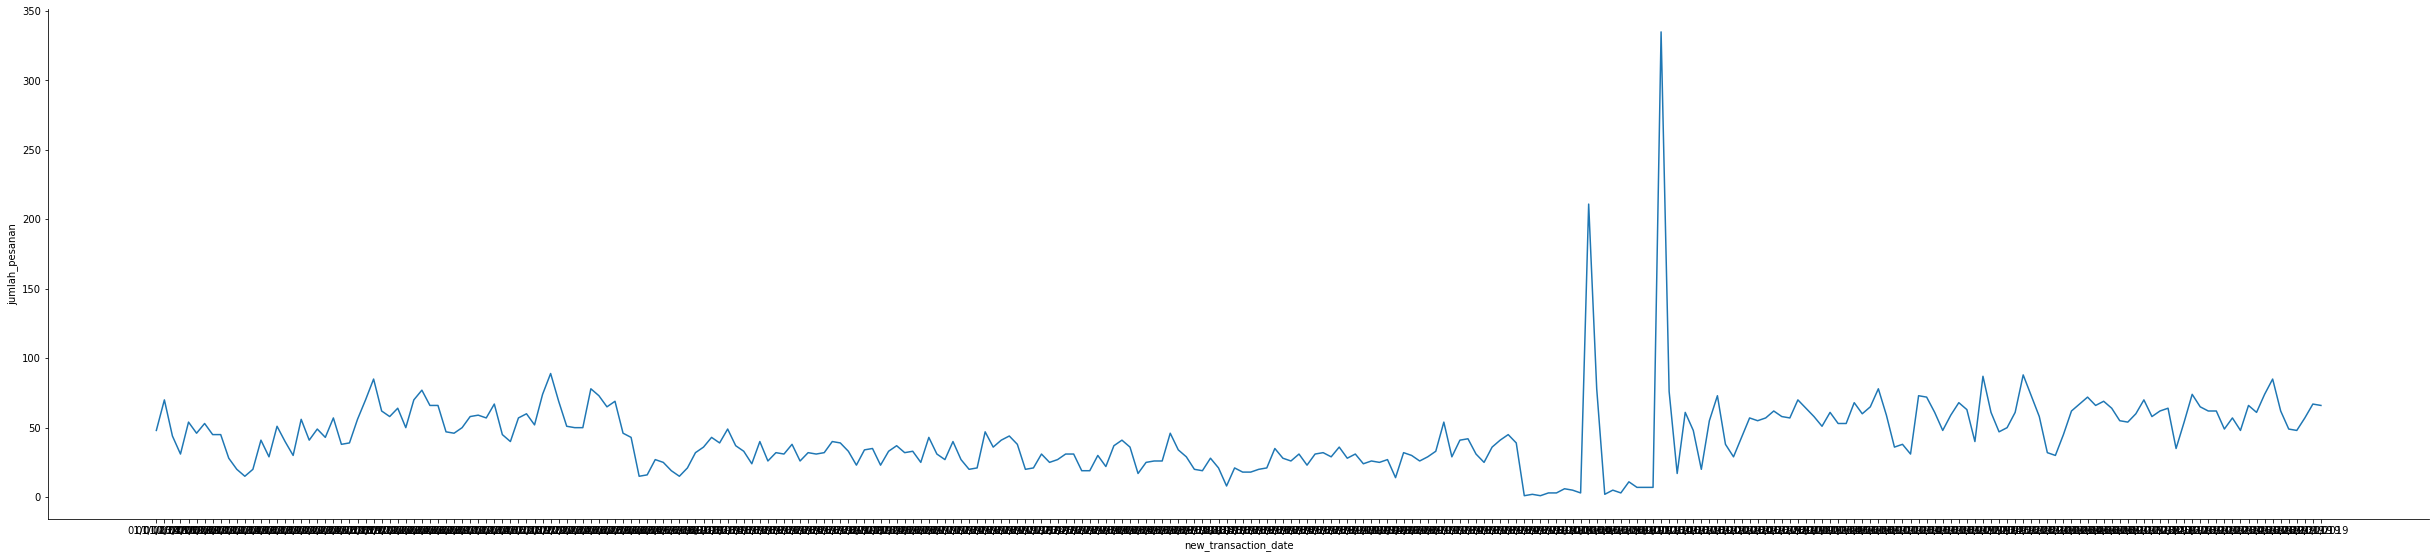

In [ ]:
# Visualisasi data data_harian
g=sns.relplot(x="new_transaction_date", y="jumlah_pesanan", kind="line", data=data_harian)
g.fig.set_size_inches(40,8)

In [ ]:
# Mengubah tipe data new_transaction_date
data['new_transaction_date'] = pd.to_datetime(data['new_transaction_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Menghapus kolom 'transction_date' karena sudah digantikan dengan 'new_transaction_date' yang memiliki datetime yang sesuai dengan yang dibutuhkan untuk analisis data.
data = data.drop(['transaction_date'], axis=1)

##### 2. Tanggal berapakah terdapat jumlah pesanan terbanyak?

In [ ]:
# Menampilkan date yang memiliki penjualan terbanyak.
data_harian.max()

new_transaction_date    12/31/2019
jumlah_pesanan                 335
dtype: object

**Penjualant terbanyak terdapat pada 31 Desember 2019.**

#### 3- Profilling Vendor

##### 1. Manakah vendor yang mempunyai rating tertinggi?

In [ ]:
# Grouping data berdasarkan vendor_rating dan vendor_tag_name
group_vendor = data.groupby('vendor_rating')['vendor_tag_name']
group_vendor.describe()

,count,unique,top,freq
vendor_rating,,,,
3.2,92,1,"Arabic,Pizzas,Sandwiches",92
3.7,53,1,"Cakes,Donuts",53
3.8,137,2,"Arabic,Breakfast,Desserts,Mandazi,Omani,Salads...",90
4.0,266,4,"Biryani,Desserts,Indian,Soups",91
4.1,269,3,"Breakfast,Burgers,Grills,Pizza,Sandwiches,Shaw...",118
4.2,1613,13,"Breakfast,Desserts,Salads,Arabic",359
4.3,2023,11,"Burgers,Fries,Kids meal,Shawarma",483
4.4,1566,11,"Pizzas,Italian,Breakfast,Soups,Pasta,Salads,De...",444
4.5,2965,17,"American,Burgers,Free Delivery,Hot Dogs,Pasta",914


**Rating tertinggi diperoleh oleh Bagels, Dessert dan Salads dengan bintang 4.8.**

##### 3. Tampilkan jumlah pesanan berdasarkan kategori vendor.

In [ ]:
# Mengetahui jumlah pesanan dari masing masing category vendor.
vendor_terbanyak = data.groupby('vendor_category')['jumlah_pesanan'].count().sort_values(ascending = False)
vendor_terbanyak

vendor_category
Restaurants       10609
Sweets & Bakes     1251
Name: jumlah_pesanan, dtype: int64

**Jumlah pesanan masing-masing kategori vendor adalah :**

- **Restaurants : 10609**
- **Sweets & Bakes : 1251**

##### 4. Manakah product vendor yang memiliki jumlah pesanan terbanyak? 

In [ ]:
product_terbanyak = data.groupby('vendor_tag_name')['jumlah_pesanan'].count().sort_values(ascending = False)
product_terbanyak

vendor_tag_name
American,Burgers,Free Delivery,Hot Dogs,Pasta                                      914
Arabic,Desserts,Free Delivery,Indian                                               733
Burgers,Desserts,Free Delivery,Pasta,Sandwiches                                    595
Burgers,Fries,Kids meal,Shawarma                                                   483
Pizzas,Italian,Breakfast,Soups,Pasta,Salads,Desserts                               444
                                                                                  ... 
Desserts,Free Delivery,Fresh Juices,Healthy Food,Ice creams,Milkshakes,Mojitos      53
Desserts,Free Delivery,Healthy Food,Sweets                                          53
American,Breakfast,Burgers,Fries,Sandwiches                                         51
Arabic,Grills,Indian,Pasta,Salads,Seafood,Soups,Sweets                              47
American,Breakfast,Rolls,Salads,Sandwiches                                          42
Name: jumlah_pesanan, Lengt

**Product dengan penjualan terbanyak adalah kategori vendor restaurant dengan tag name "American,Burgers,Free Delivery,Hot Dogs,Pasta" sebanyak 914 pesanan.**

#### 4- Payment Recommendation

##### Recommendasi metode pembayaran yang paling sering dan menjadi favorite customers dalam melakukan transaksi pembelian.

In [ ]:
payment_rec = data.groupby('payment_mode')['customer_id'].count().sort_values(ascending = False)
payment_rec

payment_mode
1    9072
2    2035
4     589
3     127
5      37
Name: customer_id, dtype: int64

**Metode pembayaran yang paling banyak digunakan oleh customers adalah metode pembayaran = 1.**

**!!! Tidak dijelaskan pada data pengertian dari masing-masing payment mode. Sehingga hanya didapatkan id dari payment_mode.**

## EXPORTING DATA

In [ ]:
# Menampilkan data yang akan di export
data

,customer_id,gender,birth_date,updated_at,latitude,longitude,order_id,jumlah_pesanan,total_pembayaran,payment_mode,vendor_discount,is_favorite,driver_rating,delivery_distance,vendor_id,location_number,vendor_category,delivery_charge,serving_distance,prepration_time,rank,vendor_rating,vendor_tag_name,device_type,age,day_los,los,new_transaction_date
0,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,165920.0,2.0,14.1,2,0.0,Yes,0.0,0.00,4,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,78.0,1155,3.164384,2019-08-05
1,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,144214.0,3.0,6.3,2,0.0,Yes,0.0,0.00,55,0,Restaurants,0.7,10.0,19,11,4.5,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3,78.0,1155,3.164384,2019-07-02
2,PH2CZRN,male,1943.0,2018-06-07 02:16:49,-0.545927,0.117637,162730.0,2.0,11.1,2,0.0,Yes,0.0,0.00,176,0,Restaurants,0.7,8.0,21,11,4.3,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",3,78.0,1155,3.164384,2019-07-31
3,YGAL6J5,female,1988.0,2020-01-15 19:58:59,-0.707368,0.045688,166213.0,2.0,12.8,1,0.0,Yes,0.0,0.00,4,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,33.0,567,1.553425,2019-08-06
4,LP3E9PN,male,1955.0,2018-06-28 12:38:20,1.385425,-1.903705,166732.0,1.0,6.8,1,0.0,Yes,0.0,0.00,4,0,Restaurants,0.0,6.0,15,11,4.4,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,66.0,1133,3.104110,2019-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,4KMSXHD,female,1966.0,2020-01-27 00:23:55,0.199798,0.509988,405464.0,2.0,9.8,1,0.0,No,0.0,4.33,681,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,55.0,556,1.523288,2020-02-25
11857,3FEMFJU,female,1976.0,2020-01-27 01:32:51,-0.127426,0.150953,405495.0,1.0,9.0,1,0.0,No,0.0,11.56,681,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,45.0,556,1.523288,2020-02-25
11858,G1RCJ67,female,2004.0,2020-01-27 23:05:20,0.233558,-78.618511,407877.0,2.0,9.8,1,0.0,No,0.0,4.35,681,0,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,17.0,555,1.520548,2020-02-26
11859,C29YUB7,female,1953.0,2020-01-30 19:47:52,-0.064995,-78.583228,414097.0,3.0,22.3,4,0.0,No,0.0,4.55,681,1,Restaurants,0.7,15.0,10,11,4.4,"Biryani,Desserts,Indian,Kebabs,Rice",3,68.0,552,1.512329,2020-02-29


In [ ]:
# Melihat data info dan memastikan tipe data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11860 entries, 0 to 11860
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           11860 non-null  object        
 1   gender                11860 non-null  object        
 2   birth_date            11860 non-null  float64       
 3   updated_at            11860 non-null  datetime64[ns]
 4   latitude              11860 non-null  float64       
 5   longitude             11860 non-null  float64       
 6   order_id              11860 non-null  object        
 7   jumlah_pesanan        11860 non-null  float64       
 8   total_pembayaran      11860 non-null  float64       
 9   payment_mode          11860 non-null  int64         
 10  vendor_discount       11860 non-null  float64       
 11  is_favorite           11860 non-null  object        
 12  driver_rating         11860 non-null  float64       
 13  delivery_distanc

In [ ]:
# Periksa missing values
data.isnull().sum()

customer_id             0
gender                  0
birth_date              0
updated_at              0
latitude                0
longitude               0
order_id                0
jumlah_pesanan          0
total_pembayaran        0
payment_mode            0
vendor_discount         0
is_favorite             0
driver_rating           0
delivery_distance       0
vendor_id               0
location_number         0
vendor_category         0
delivery_charge         0
serving_distance        0
prepration_time         0
rank                    0
vendor_rating           0
vendor_tag_name         0
device_type             0
age                     0
day_los                 0
los                     0
new_transaction_date    0
dtype: int64

In [ ]:
# Menyimpan dataframe yang sudah bersih

path_data = '/content/gdrive/MyDrive/Summer/Meet 12/Restaurant Recommendation/Data/'

### data.to_csv(path_data + "DataClean.csv")

## KESIMPULAN 
Create the story


Customers memiliki dominan gender yaitu gender male(laki-laki) yang berjumlah 4.573 customers. Dan customers gender female(perempuan) berjumlah 1.692 customers. Dengan usia paling banyak yaitu usia 22 tahun dengan jumlah 788 customers. Rata-rata usia yaitu 48 tahun, usia tertua yaitu 117 tahun, dan usia termuda yaitu 7 tahun. 

Customers memiliki persebaran lokasi yang cukup banyak, dimana dikelompokan dalam location_number yang berjumlah 15 kategori lokasi. Customers paling banyak berada pada kategori location_number '0' dengan jumlah sebesar 3.541 customers. Location_number sendiri merupakan alamat lokasi pengiriman dari pesanan, sehingga memungkinkan customers untuk memiliki location_number lebih dari 1. 

Data ini juga dapat digunakan saat ingin menentukan akan membuka cabang restaurant dimana. Dapat menggunakan lokasi yang masuk pada kategori lokasi '0', dengan harapan dapat membuat pesanan lebih banyak lagi karena jumlah pesanan terdahulu yang dominan berada pada lokasi kategori tersebut.

Length of Stay dari customers sendiri berkisar antara 1-3 tahun dengan rata-rata Length of Stay adalah 2.2 tahun. Dan Length of Stay paling umum yaitu 1 tahun denga jumlah 1.200 customers. 

Jumlah pesanan terbanyak terdapat pada bulan Desember 2019 dengan jumlah 4.856 pesanan. Dan jumlah pesanan paling sedikit terdapat pada bulan September 2019 dengan jumlah 1.556 pesanan.

Jumlah pemesanan terbanyak berada pada kategori vendor 'Restaurant' dengan tag name "American,Burgers,Free Delivery,Hot Dogs,Pasta" yang berjumlah 2.451 pesanan dengan rating bintang 4. Sementara itu dari sisi kategori vendor 'Sweet & Bakes' jumlah pesanan terbanyak terdapat pada tag name "Churros" yang berrjumlah 582 pesanan dengan rating bintang 4. Jumlah pesanan tersebut terhitung sejak bulan Juni 2019 sampai Februari 2020. 

Device yang digunakan oleh customers bertipe sama, yaitu device type '3'. Metode pembayaran yang paling banyak digunakan oleh customers adalah payment mode '1'. Sehingga nantinya dapat merokemendasikan pembayaran bertipe '1' pada device type '3'. Dan perusahaan dapat upgrade tampilan ui&ux yang flexible dan mudah dioperasikan pada device type '3'. Agar customers merasa dimudahkan dan memiliki pengalaman pembelian yang mengesankan saat memesan pesanan. Sehingga nantinya akan membuat customers memiliki Length of Stay yang dapat bertahan lama dan dapat terus kembali memesan pada perusahaan restaurant kita.

Dari beberapa insight data yang ditemukan, maka didapatkan pula rekomendasi-rekomendasi yang dapat meningkatkan revenue perusahaan seperti yang telah disebutkan sebelumnya, seperti target customer, product recommendation, dan payment recommendation. Selain itu, harus diperhatikan pula rating dari setiap produk, apakah produk tersebut menjadi favorit customers atau tidak, dapat pula memberikan diskon pada waktu-waktu tertentu untuk memancing pembelian, memerhatikan ui&ux dari aplikasi pada tiap-tiap device, dan membuka cabang pada daerah lokasi yang paling banyak customersnya.

## REKOMENDASI

Berdasarkan Analisis data yang telah dilakukan, didapatkan beberapa rekomendasi untuk meningkatkan revenue dari perusahaan restaurant :

1. **Target Customers**
- Target customers dengan gender laki-laki. Berusia sekitar 22 tahun. Lokasi pada daerah kategori lokasi '0'. 

2. **Product Recommendation**
- Produk yang direkomendasikan yaitu dari kategori vendor Restaurant dengan tag name "American,Burgers,Free Delivery,Hot Dogs,Pasta". 

- Selain itu, untuk kategori Sweet & Bakes dapat direkomendasikan product tag name "Churros". Meskipun jauh dari jumlah pembelian rekomendasi vendor Restaurant, namun pada kategori Sweet&Bakes, Churros memiliki jumlah pembelian terbanyak.

3. **Payment method recomendation**
- Payment methode recommendation yaitu payment mode '1'.

4. **Location**
- Jika ingin membuka cabang, maka disarankan dapat membuka cabang di daerah lokasi kategori '0'.

5. **Device**
- Meningkatkan ui&ux pada device type '3'. Dikarenakan device type '3' digunakan oleh semua customers yang ada pada data.

6. **Rating dan Favorite**
- Memerhatikaan rating dan favorit, karena produk yang memiliki jumlah pemesanan tinggi juga memiliki rating tinggi dan menjadi favorite customers.

7. **Penjualan Order**
- Dapat memberikan diskon pada hari-hari special tertentu, agar menarik perhatian dan pembelian customers.